In [2]:
import numpy as np 
import pandas as pd 
import os

for dirname, _, filenames in os.walk(r'F:\Tejaswini\6th_Sem\DL\Game of deep learning\train\images'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

F:\Tejaswini\6th_Sem\DL\Game of deep learning\train\images\1001524.jpg
F:\Tejaswini\6th_Sem\DL\Game of deep learning\train\images\1001804.jpg
F:\Tejaswini\6th_Sem\DL\Game of deep learning\train\images\1003035.jpg
F:\Tejaswini\6th_Sem\DL\Game of deep learning\train\images\1004028.jpg
F:\Tejaswini\6th_Sem\DL\Game of deep learning\train\images\1004054.jpg
F:\Tejaswini\6th_Sem\DL\Game of deep learning\train\images\1005343.jpg
F:\Tejaswini\6th_Sem\DL\Game of deep learning\train\images\1007700.jpg
F:\Tejaswini\6th_Sem\DL\Game of deep learning\train\images\1008439.jpg
F:\Tejaswini\6th_Sem\DL\Game of deep learning\train\images\1010906.jpg
F:\Tejaswini\6th_Sem\DL\Game of deep learning\train\images\1011369.jpg
F:\Tejaswini\6th_Sem\DL\Game of deep learning\train\images\1011813.jpg
F:\Tejaswini\6th_Sem\DL\Game of deep learning\train\images\1013663.jpg
F:\Tejaswini\6th_Sem\DL\Game of deep learning\train\images\1014573.jpg
F:\Tejaswini\6th_Sem\DL\Game of deep learning\train\images\1015027.jpg
F:\Tej

# Importing Necessary Libraries

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import cv2
import tensorflow as tf
from sklearn.model_selection import train_test_split
from keras.layers import Dense, Conv2D, Flatten
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.math import confusion_matrix
import warnings
warnings.filterwarnings('ignore')

# Data Import

In [4]:
train = pd.read_csv(r'F:\Tejaswini\6th_Sem\DL\Game of deep learning\train\train.csv')

# Data Analysis

In [5]:
train.head()

image  category
0  2823080.jpg         1
1  2870024.jpg         1
2  2662125.jpg         2
3  2900420.jpg         3
4  2804883.jpg         2

In [6]:
train.tail()

image  category
6247  2881056.jpg         3
6248  1145083.jpg         2
6249  2898652.jpg         5
6250  2868175.jpg         3
6251  2784171.jpg         1

In [7]:
train.describe()

category
count  6252.000000
mean      2.657550
std       1.528998
min       1.000000
25%       1.000000
50%       2.000000
75%       4.000000
max       5.000000

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6252 entries, 0 to 6251
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   image     6252 non-null   object
 1   category  6252 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 97.8+ KB


In [9]:
train.shape

(6252, 2)

In [10]:
train.isnull().sum()

image       0
category    0
dtype: int64

<Axes: xlabel='category', ylabel='count'>

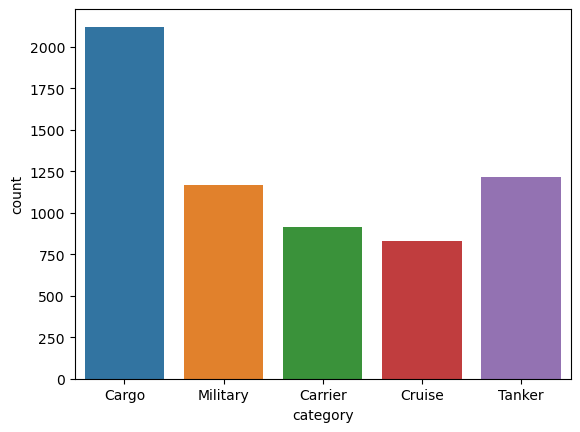

In [11]:
ship_categories = {1: 'Cargo', 2: 'Military', 3: 'Carrier', 4: 'Cruise', 5: 'Tanker'}
sns.countplot(x=train["category"].map(ship_categories))

<Axes: ylabel='category'>

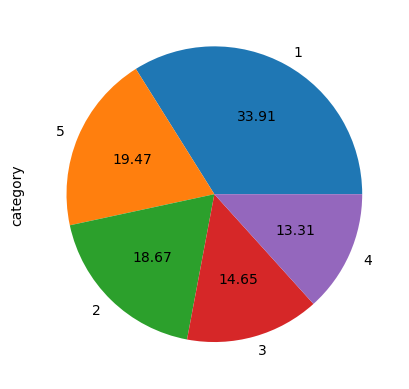

In [12]:
pie = train.loc[:, "category"].value_counts()
pie.plot.pie(autopct='%.2f')

<Axes: ylabel='category'>

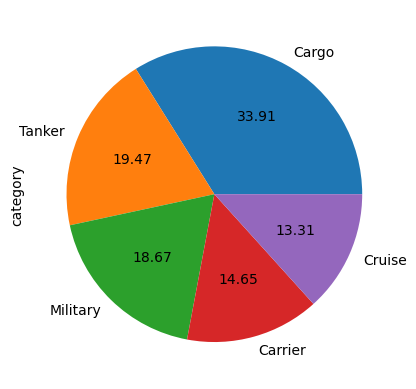

In [13]:
pie = train["category"].map(ship_categories).value_counts()
pie.plot.pie(autopct='%.2f')

# Data Preprocessing

**Function to load and preprocess an image**

In [14]:
path = r'F:\Tejaswini\6th_Sem\DL\Game of Deep Learning\train\images'
target_shape = (128, 128, 3)

def load_and_preprocess_image(image_path, target_shape):
    img = plt.imread(image_path)
    img = cv2.resize(img, (target_shape[1], target_shape[0]))  # Resize the image
    return img

**Load and preprocess images to an array of RGB colors**

In [15]:
refactor_size = 128
resized_image_list = []
all_paths = []

for i in range(len(train)):
    image_path = os.path.join(path, train["image"][i])
    img = tf.keras.utils.load_img(image_path, target_size=(refactor_size, refactor_size))
    img_vals = tf.image.convert_image_dtype(img, tf.float32)
    imgarr = tf.keras.utils.img_to_array(img_vals)
    resized_image_list.append(imgarr)
    all_paths.append(image_path)
    
resized_image_list = np.asarray(resized_image_list) #List of preprocessed images

**Plotting first 20 Images**

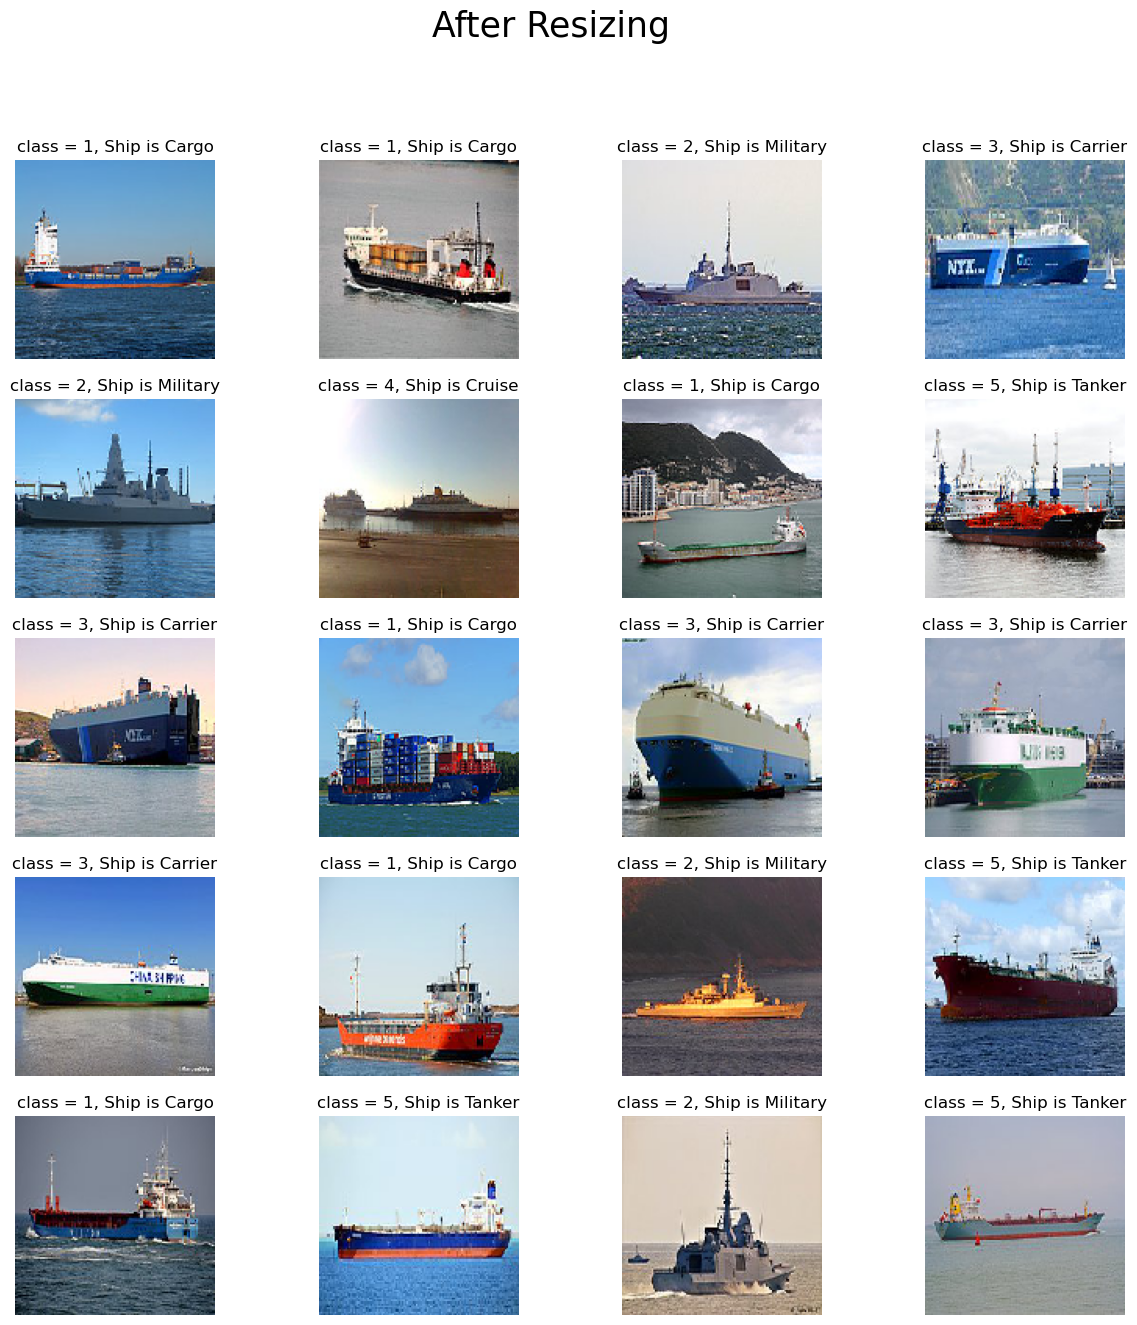

In [16]:
nrow = 5
ncol = 4
fig1 = plt.figure(figsize=(15, 15))
fig1.suptitle('After Resizing', size=25)
for i in range(20):
    plt.subplot(nrow, ncol, i + 1)
    plt.imshow(resized_image_list[i])
    plt.title('class = {x}, Ship is {y}'.format(x=train["category"][i], y=ship_categories[train["category"][i]]))
    plt.axis('Off')
    plt.grid(False)
plt.show()

In [17]:
# Saving the preprocessed images in the desired folder

# from PIL import Image
# import csv

# output_dir = r'Game of deep learning\DL\train\Preprocessed'

# if not os.path.exists(output_dir):
#     os.makedirs(output_dir)
    
# for i, img_arr in enumerate(resized_image_list):
#     img_pil = Image.fromarray(np.uint8(img_arr*255))
#     img_path = os.path.join(output_dir, f'resized_image_list_{i}.jpg')
#     img_pil.save(img_path)
#     print(f'Saved images {i} to {img_path}')

In [18]:
# !pip install opencv-python

#### Data augmentation 

In [19]:
data_augmentation = tf.keras.Sequential([tf.keras.layers.RandomFlip('horizontal'), tf.keras.layers.RandomRotation(0.2),])
augmented_images = data_augmentation(resized_image_list)

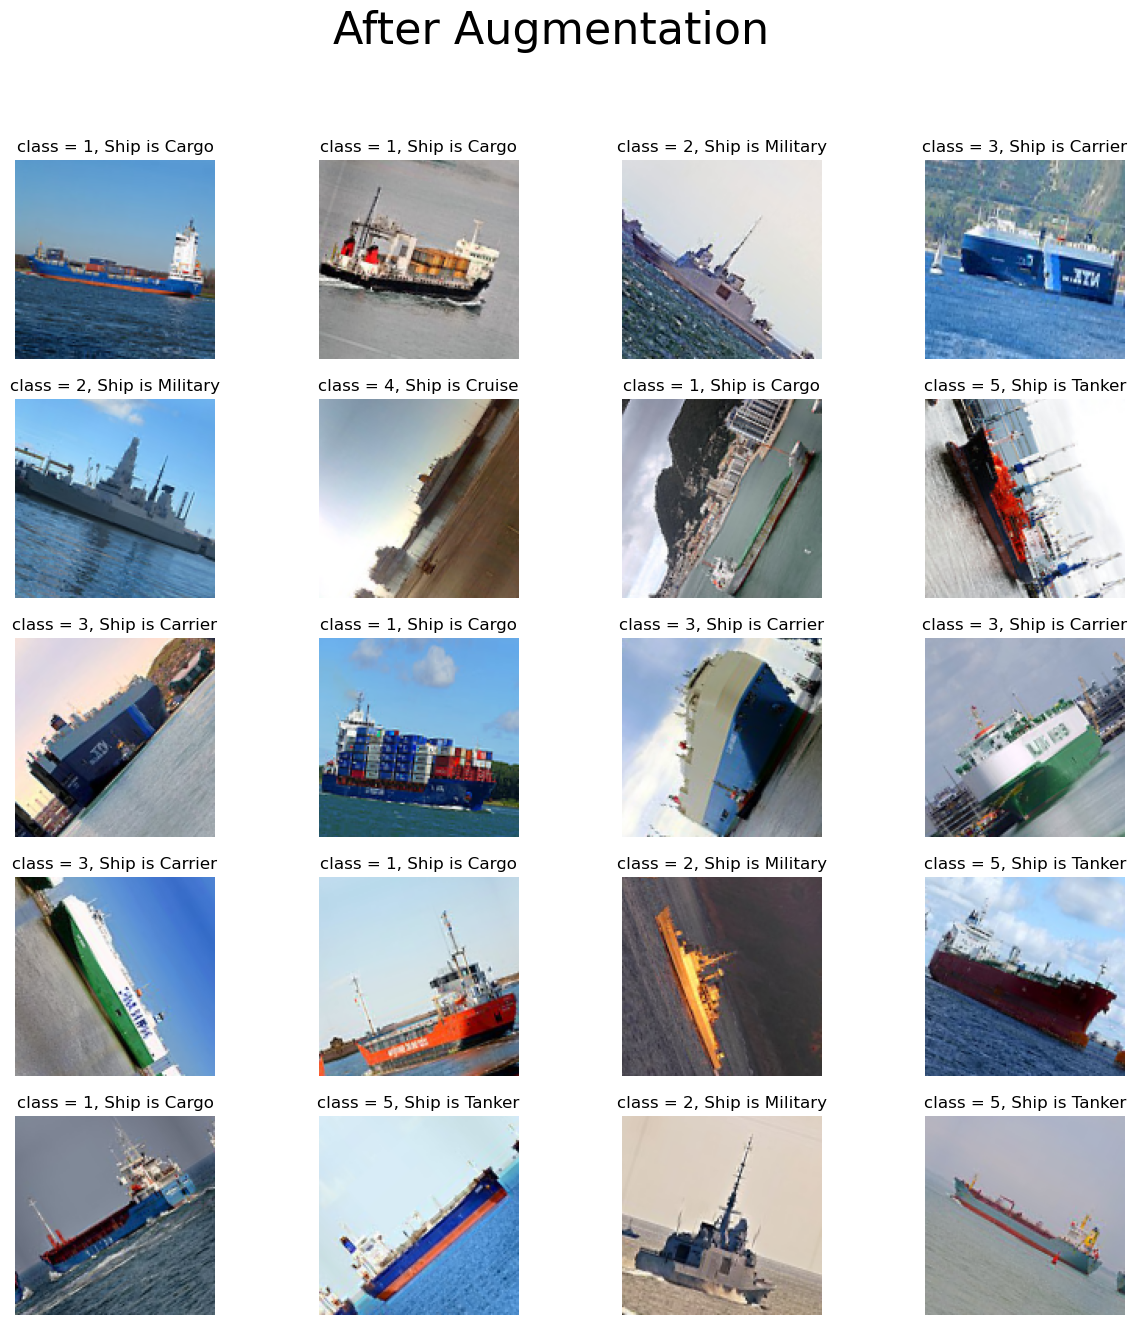

In [20]:
fig2 = plt.figure(figsize=(15, 15))
fig2.suptitle('After Augmentation', size=32)
for i in range(20):
    plt.subplot(nrow, ncol, i + 1)
    plt.imshow(augmented_images[i])
    plt.title('class = {x}, Ship is {y}'.format(x=train["category"][i], y=ship_categories[train["category"][i]]))
    plt.axis('Off')
    plt.grid(False)
plt.show()

In [21]:
cat_values = train["category"] - 1
cat_values.value_counts()

0    2120
4    1217
1    1167
2     916
3     832
Name: category, dtype: int64

In [22]:
ship_categories = {0: 'Cargo', 1: 'Military', 2: 'Carrier', 3: 'Cruise', 4: 'Tanker'}

### Train Test Split

In [38]:
x_train, x_test, y_train, y_test = train_test_split(resized_image_list, cat_values, random_state=30)
print(x_train.shape, y_train.shape)

(4689, 128, 128, 3) (4689,)


### CNN Model

In [39]:
model = models.Sequential([
    tf.keras.Input(shape=(128, 128, 3)),
    data_augmentation,
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='sigmoid'),
    layers.Dense(5, activation='softmax')
])

In [40]:
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)

#### Compile the model

In [41]:
model.compile(optimizer="adam", loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [42]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=50, callbacks=[checkpoint])

Epoch 1/50


147/147 [==============================] - ETA: 0s - loss: 1.4249 - accuracy: 0.3928
Epoch 1: val_accuracy improved from -inf to 0.47089, saving model to best_model.h5
147/147 [==============================] - 64s 409ms/step - loss: 1.4249 - accuracy: 0.3928 - val_loss: 1.2557 - val_accuracy: 0.4709
Epoch 2/50
147/147 [==============================] - ETA: 0s - loss: 1.2223 - accuracy: 0.4907
Epoch 2: val_accuracy improved from 0.47089 to 0.53039, saving model to best_model.h5
147/147 [==============================] - 58s 396ms/step - loss: 1.2223 - accuracy: 0.4907 - val_loss: 1.1281 - val_accuracy: 0.5304
Epoch 3/50
147/147 [==============================] - ETA: 0s - loss: 1.1211 - accuracy: 0.5295
Epoch 3: val_accuracy improved from 0.53039 to 0.55150, saving model to best_model.h5
147/147 [==============================] - 59s 404ms/step - loss: 1.1211 - accuracy: 0.5295 - val_loss: 1.0458 - val_accuracy: 0.5515
Epoch 4/50
147/147 [==============================] -

#### Load the best model saved during training

In [43]:
best_model = models.load_model('best_model.h5')

In [45]:
test_loss, best_test_acc = best_model.evaluate(x_test, y_test, verbose=2)
print("\nBest Test Accuracy:", best_test_acc)

49/49 - 5s - loss: 0.5641 - accuracy: 0.7946 - 5s/epoch - 104ms/step

Best Test Accuracy: 0.7946256995201111
